(array([40], dtype=int64),)
Elapsed time =  0.007999897003173828  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


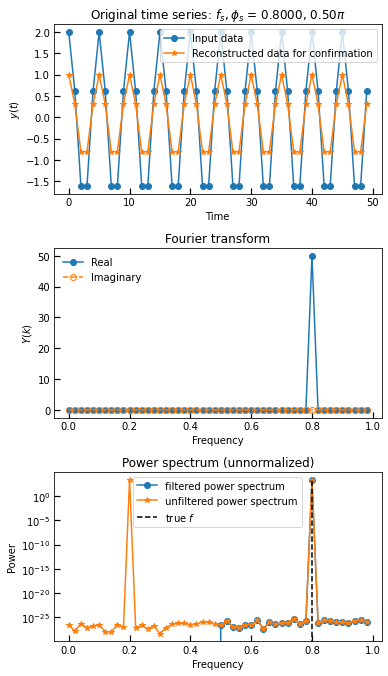

In [1]:
# ftdemo - Discrete Fourier transform demonstration program

# Set up configuration options and special features
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import os

#* Initialize the sine wave time series to be transformed
#     N = dinput('Enter the total number of data points: ')
N = 50
#     freq = finput('Enter the frequency of the sine wave: ')
freq = .8
freq2 = .2
#     phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')
phase = np.pi/2
phase2 = np.pi/2
dt = 1   # Time increment


    ## Problem 1

f_critical = 1/(2*dt)
# Generate the data for the time series
t = np.arange(N)*dt # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
y = np.sin(2*np.pi*t*freq + phase) + np.sin(2*np.pi*t*freq2 + phase)   # Sine wave time series
fk = np.arange(N)/(N*dt) # f = [0, 1/(N*dt), ... ], k index

# Lets use a finely sampled function to compare to the data, for plotting purposes:
tmod = np.linspace(0,t[-1],1024)
ymod = np.sin(2*np.pi*tmod*freq + phase)

text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

#* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
Y = np.zeros(N,dtype=complex)
Y_nf = np.zeros(N, dtype=complex)
#     Method = dinput('Compute transform by: 1) Direct summation; 2) FFT ? ')
Method = 1 # direct summation

startTime = time.time()
if Method == 1:             # Direct summation
    twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
    for k in range(N):
        for j in range(N):
            expTerm = np.exp(twoPiN*j*k)
            Y[k] += y[j] * expTerm
            Y_nf[k] += y[j] * expTerm
            if fk[j] < f_critical: # cutoff at critical freq
                Y[j] = 0
            
                
                
else:                        # Fast Fourier transform:
    Y = np.fft.fft(y)               # numpy.fft.fft()

stopTime = time.time()
    
print(np.where(Y > f_critical))
print('Elapsed time = ', stopTime - startTime, ' seconds')

# power spectrum :
P = np.abs(Y)**2
P_nofilter = np.abs(Y_nf)**2
y_j = np.fft.ifft(Y) 

# set bigger default font size for plots
plt.rcParams.update({'font.size': 10})


#* Graph the time series and its transform
# Top subplot: time axis
fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(5.5, 9.5))

ax1[0].plot(t,y,'-o', label='Input data')
ax1[0].plot(t, y_j, '-*', label = 'Reconstructed data for confirmation' )
ax1[0].set_title('Original time series: ' + text_vals,fontsize=12)
ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('$y(t)$')
ax1[0].legend(frameon=True)
ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

# Middle subplot: fourier transform
ax1[1].plot(fk, np.real(Y),'-o', label='Real')
ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
ax1[1].legend(frameon=False)
ax1[1].set_title('Fourier transform',fontsize=12)
ax1[1].set_xlabel('Frequency')
ax1[1].set_ylabel('$Y(k)$')
ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

# Bottom subplot: Power Spectrum
ax1[2].semilogy(fk, P,'-o', label = 'filtered power spectrum')
ax1[2].semilogy(fk, P_nofilter, '-*', label = 'unfiltered power spectrum')
ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
ax1[2].set_xlabel('Frequency')
ax1[2].set_ylabel('Power')
ax1[2].legend(loc='best')
ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
#savefig('ftdemo_fig2.png')


plt.tight_layout()

save = False # Set this flag to true if you want to save the plots.
if save:
    today = str(datetime.date.today())
    fig_directory = os.path.expanduser('~/figs_out/' + today)
    try:
        os.makedirs(fig_directory)
    except FileExistsError:
        pass

    timeindex = time.strftime("%H%M%S")
    fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

plt.show()
    
        




In [2]:
# y_j = np.fft.ifft(Y) 

# plt.figure()
# plt.title('Recovered Fourier Transform as a function of time')
# plt.plot(t, y_j, 'k-o', label =  'y')
# plt.show()

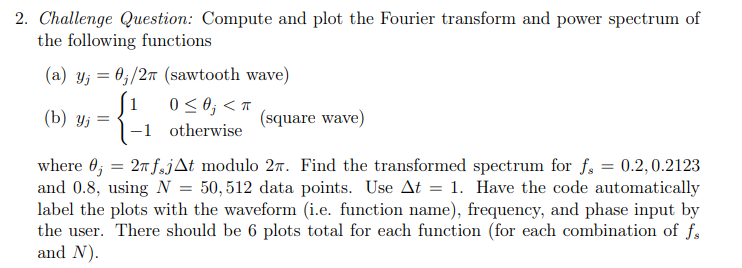

Elapsed time =  0.00902700424194336  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


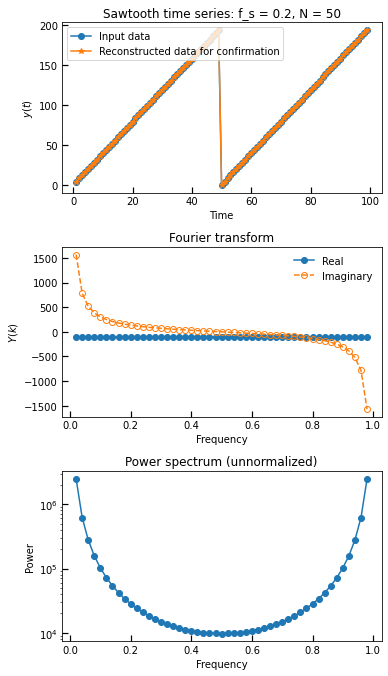

Elapsed time =  0.0030002593994140625  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


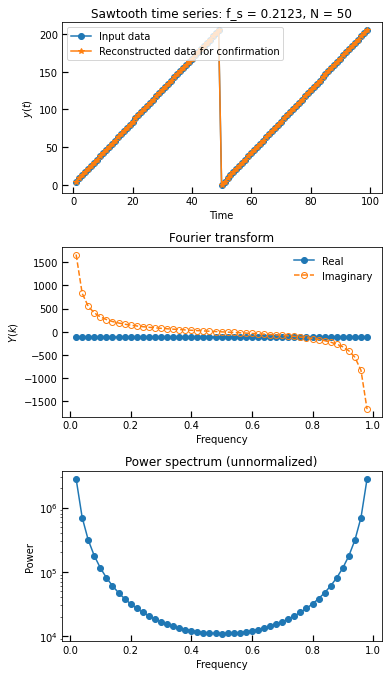

Elapsed time =  0.002999544143676758  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


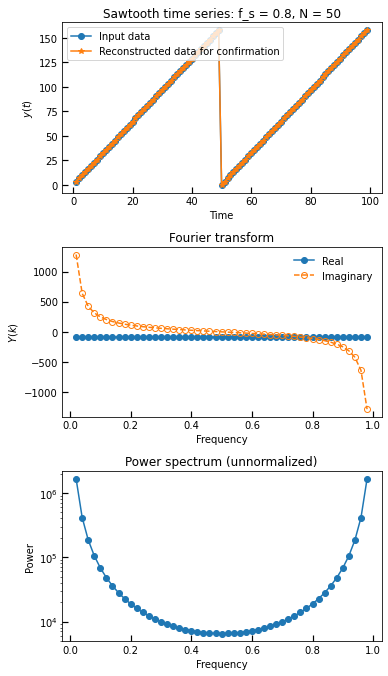

Elapsed time =  0.37399816513061523  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


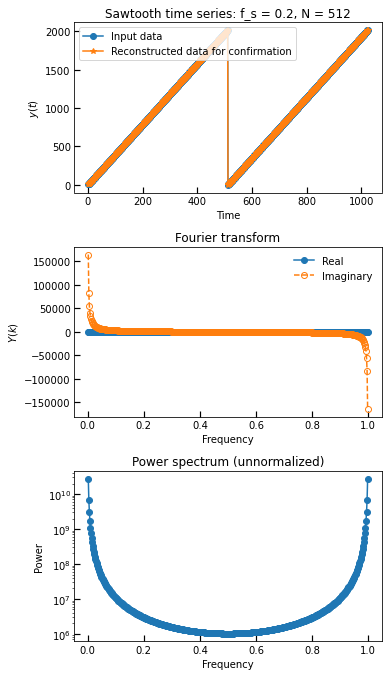

Elapsed time =  0.3599991798400879  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


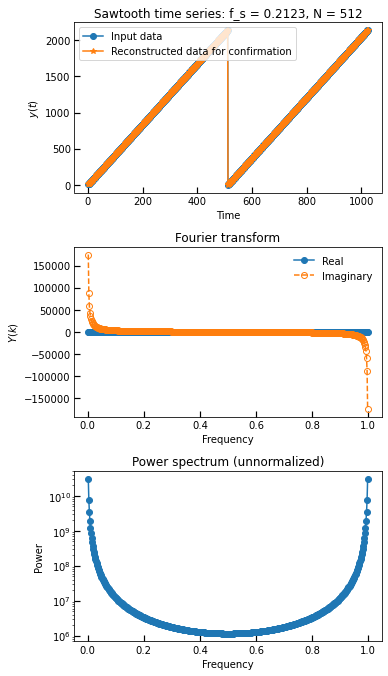

Elapsed time =  0.3713693618774414  seconds


C:\Users\Jason\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


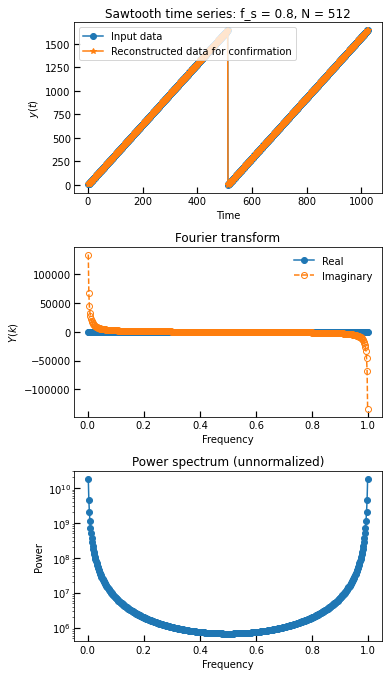

In [18]:

freqs = [0.2, 0.2123, 0.8]
Nvals = [50, 512]
dt = 1  # Time increment

for N in Nvals:
    for f_s in freqs:
        # Generate the data for the time series
        f_critical = 1/(2*dt)
        t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
        #Sawtooth

        sawtooth = []
        for m in range(N):
            saw = 2*np.pi*f_s*dt % 2*np.pi   # Sine wave time series
            sawtooth.append(saw) 

        fk = np.arange(N)/(N*dt)  # f = [0, 1/(N*dt), ... ], k index

        # Lets use a finely sampled function to compare to the data, for plotting purposes:
        tmod = np.linspace(0, t[-1], 1024)
        ymod = np.sin(2*np.pi*tmod*freq + phase)

        text_vals = f'frequency = {f_s}, {N} points'

        #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
        Y = np.zeros(N,dtype=complex)
        Y_nf = np.zeros(N, dtype=complex)
        Method = 1 # direct summation
        seer = np.zeros(N)
        startTime = time.time()
        if Method == 1:             # Direct summation
            twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
            for k in range(N):
                for j in range(N):
                    expTerm = np.exp(twoPiN*j*k)
                    Y[k] += sawtooth[j]*j * expTerm
                    Y_nf[k] += sawtooth[j]*j * expTerm
                    seer[j] += sawtooth[j]*j/N

        stopTime = time.time()

        print('Elapsed time = ', stopTime - startTime, ' seconds')

        # power spectrum :
        P = np.abs(Y)**2
        P_nofilter = np.abs(Y_nf)**2
        y_j = np.fft.ifft(Y)
        
        # repeating for visual verification
        seer = np.append(seer,seer)
        y_j = np.append(y_j,y_j)
        t = np.arange(len(seer))*dt

        plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

        fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(5.5, 9.5))
        #* Graph the time series and its transform
        # Top subplot: time axis
        ax1[0].plot(t[1:],seer[1:],'-o', label='Input data')
        #     ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
        ax1[0].plot(t[1:], y_j[1:], '-*', label = 'Reconstructed data for confirmation' )
        ax1[0].set_title('Sawtooth time series: ' + text_vals,fontsize=12)
        ax1[0].set_xlabel('Time')
        ax1[0].set_ylabel('$y(t)$')
        ax1[0].legend(frameon=True)
        ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

        # Middle subplot: fourier transform
        ax1[1].plot(fk[1:], np.real(Y)[1:],'-o', label='Real')
        ax1[1].plot(fk[1:], np.imag(Y)[1:],'--o',mfc='None', label='Imaginary')
        ax1[1].legend(frameon=False)
        ax1[1].set_title('Fourier transform',fontsize=12)
        ax1[1].set_xlabel('Frequency')
        ax1[1].set_ylabel('$Y(k)$')
        ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

        # Bottom subplot: Power Spectrum
        ax1[2].semilogy(fk[1:], P[1:],'-o')
        # ax1[2].semilogy(fk[1:], P_nofilter[1:], '-*', label = 'unfiltered power spectrum')
        # ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
        ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
        ax1[2].set_xlabel('Frequency')
        ax1[2].set_ylabel('Power')
#         ax1[2].legend(loc='best')
        ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
        #savefig('ftdemo_fig2.png')

        plt.tight_layout()

        save = False # Set this flag to true if you want to save the plots.
        if save:
            today = str(datetime.date.today())
            fig_directory = os.path.expanduser('~/figs_out/' + today)
            try:
                os.makedirs(fig_directory)
            except FileExistsError:
                pass

            timeindex = time.strftime("%H%M%S")
            fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

        plt.show()
